In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [43]:
# read train 
train = pd.read_csv("./train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# read test 
test= pd.read_csv("./test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

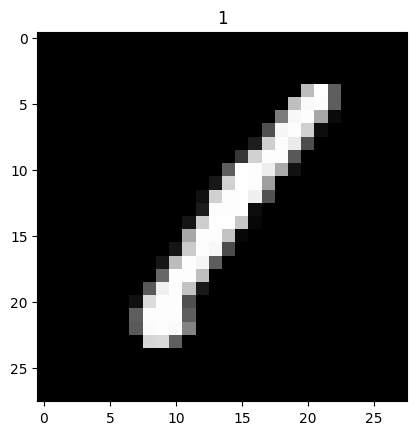

In [48]:
# Plot some samples
img = X_train.iloc[0].to_numpy()  # Use to_numpy() instead of as_matrix()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0, 0])  # Assuming 'train' is the DataFrame that includes your labels
plt.show()

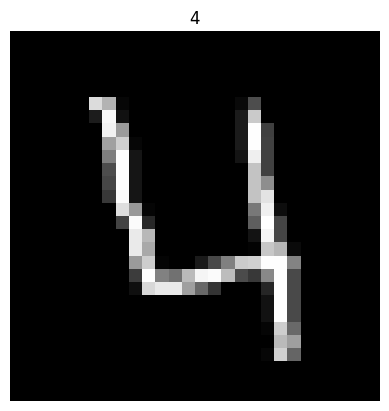

In [49]:
# Plot some samples
img = X_train.iloc[3].to_numpy()  # Updated from as_matrix() to to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3, 0])  # Assuming 'train' has the labels
plt.axis("off")  # Hides the axis
plt.show()

<a id="2"></a>
## Нормализация, Решейпинг and Энкодинг 

- Нормализация: убираем влияние серого
- Решейпинг: 28 x 28 -> 28x28x1 (для Keras)
- Encoding (one hotting)
    * 2 => [0,0,1,0,0,0,0,0,0,0]
    * 4 => [0,0,0,0,1,0,0,0,0,0]

In [50]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [51]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [53]:
# Label Encoding 
from tensorflow.keras.utils import to_categorical  # Corrected import path

# Assuming Y_train is your label data
Y_train = to_categorical(Y_train, num_classes=10)

## Подготовка данных
* Тестовые данные – 10%.

In [55]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (34020, 28, 28, 1)
x_test shape (3780, 28, 28, 1)
y_train shape (34020, 10)
y_test shape (3780, 10)


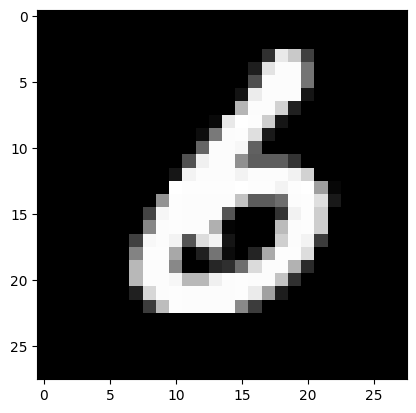

In [56]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="4"></a>
## Convolutional Neural Network 
* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

### Что такое операция свертки?

* У нас есть несколько изображений и **детектор признаков (3x3) (5x5)**

* **Детектор признаков – это наше ядро.** Это фильтр, который говорит нам, чем является изображение.

* Детектор признаков обнаруживает такие элементы, как края или выпуклые формы. Например, если входными данными является собака, детектор признаков может обнаружить такие признаки, как ухо или хвост собаки.
* feature map = conv(input image, feature detector). Поэлементное перемножение матриц (свертка).
* Шаг = Перемещение по входному объекту. Чем больше шаг, тем больше уменьшается размер выходного изображения.
* Производя свертку мы не только уменьшаем размер изображения, но и теряем информацию.
* Мы создаем несколько маппингов объектов, так как имеем несколько фильтров.
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* После применения свертки мы используем функцию активании RELU. Она разрушит линейность (так как изображения нелинейны).
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

### Что мы получаем
<img src="https://docs.gimp.org/2.6/en/images/filters/generic/convolution.png" alt="padding" border="0">

| Sharpen | Blur | Edge enhance | Edge detect | Emboss |
|----------|----------|----------|----------|----------|
|<img src="https://docs.gimp.org/2.6/en/images/filters/examples/generic-taj-convmatrix-sharpen.jpg" alt="padding" border="0">| <img src="https://docs.gimp.org/2.6/en/images/filters/examples/generic-taj-convmatrix-blur.jpg" alt="padding" border="0"> | <img src="https://docs.gimp.org/2.6/en/images/filters/examples/generic-taj-convmatrix-edge-enhance.jpg" alt="padding" border="0"> | <img src="https://docs.gimp.org/2.6/en/images/filters/examples/generic-taj-convmatrix-edge-detect.jpg" alt="padding" border="0"> | <img src="https://docs.gimp.org/2.6/en/images/filters/examples/generic-taj-convmatrix-emboss.jpg" alt="padding" border="0"> |
|<img src="https://docs.gimp.org/2.6/en/images/filters/examples/convolution-sharpen.png" alt="padding" border="0">| <img src="https://docs.gimp.org/2.6/en/images/filters/examples/convolution-blur.png" alt="padding" border="0">|<img src="https://docs.gimp.org/2.6/en/images/filters/examples/convolution-edge.png" alt="padding" border="0">|<img src="https://docs.gimp.org/2.6/en/images/filters/examples/convolution-edge-detect1.png" alt="padding" border="0">|<img src="https://docs.gimp.org/2.6/en/images/filters/examples/convolution-emboss.png" alt="padding" border="0">|


<a id="6"></a>
### Same Padding
* Поскольку мы продолжаем применять свёрточные слои, размер объёма будет уменьшаться быстрее, чем нам хотелось бы. На ранних уровнях нашей сети мы хотим сохранить как можно больше информации об исходном входном объеме, чтобы мы могли извлечь эти низкоуровневые функции.
* Размер ввода и размер вывода одинаковы.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling

**Max Pooling** — это техника уменьшения размерности, широко используемая в сверточных нейронных сетях (CNN). Этот процесс включает выбор максимального значения из каждой части входной матрицы или изображения. Рассмотрим ключевые аспекты Max Pooling и его применение.

### Как работает Max Pooling
Max Pooling обычно применяется после операции свертки. Процесс состоит из следующих шагов:

1. Выбор размера окна: Определяется размер окна, например 2x2 или 3x3 пикселя. Это окно будет "скользить" по всему изображению.
2. Выбор шага: Шаг (stride) определяет, на сколько пикселей сдвигается окно при каждом перемещении. Обычно размер шага равен размеру окна, что предотвратит перекрытие.
3. Выбор максимального значения: В каждом окне выбирается максимальное значение. Это значение представляет собой результат Max Pooling для данного окна.


### Зачем нужен Max Pooling
* **Уменьшение размерности:** Max Pooling значительно уменьшает размер данных, сохраняя при этом важные признаки. Это сокращает количество параметров и вычислений в сети, что повышает её эффективность и уменьшает вероятность переобучения.
* **Инвариантность к перемещению:** Пулинг помогает сделать представление данных более инвариантным к небольшим изменениям и смещениям во входном изображении. Это значит, что небольшие перемещения или трансформации объекта на изображении не окажут значительного влияния на результаты.
* **Выделение ключевых признаков:** Поиск максимального значения помогает выделить наиболее выразительные признаки (например, края или текстуры), которые важны для последующих слоев сети для выполнения классификации или других задач.

* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

### Пример Max Pooling

<img src="https://mriquestions.com/uploads/3/4/5/7/34572113/example-max-and-avg-pooling_orig.png" alt="maxpool" border="0">


<a id="8"></a>
### Flattening
<a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Полносвязные слои
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network

<a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

### Как свертка выглядит еще раз

<img src="https://python-school.ru/wp-content/uploads/2020/11/2020-11-04_17-03-1.png" alt="fullyc" border="0">

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [58]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [60]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### Создаем модель

In [66]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
### Epochs and Batch Size
* Предположим, у вас есть набор данных из 10 примеров (или образцов). У вас есть **размер пакета**, равный 2, и вы указали, что хотите, чтобы алгоритм работал в течение 3 **эпох**. Следовательно, в каждую эпоху у вас есть 5 **партий** (10/2 = 5). Каждый пакет проходит через алгоритм, поэтому у вас есть 5 итераций **на эпоху**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

In [61]:
epochs = 10  # for better result increase the epochs
batch_size = 250 # количество примеров, которые рассматриваются для одного изменения весов

<a id="15"></a>
### Data Augmentation
* Чтобы избежать проблемы переобучения, нам необходимо искусственно расширить наш набор данных рукописных цифр.
* Измените обучающие данные с помощью небольших преобразований, чтобы воспроизвести вариации цифр.
* Например цифра не по центру Масштаб не тот (некоторые пишут большими/маленькими цифрами) Изображение повернуто.

<a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [62]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

<a id="16"></a>
### Fit the model

In [67]:
# Assuming 'datagen' is already defined as an instance of ImageDataGenerator
# and you have already defined 'X_train', 'Y_train', 'X_val', 'Y_val', and 'batch_size'

# Update from fit_generator to fit
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch = X_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(X_val, Y_val)
)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9258 - loss: 0.2365 - val_accuracy: 0.9775 - val_loss: 0.0748
Epoch 2/10
  1/136 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9400 - loss: 0.1821

2024-05-04 09:26:52.936955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.1821 - val_accuracy: 0.9780 - val_loss: 0.0755
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9357 - loss: 0.2061 - val_accuracy: 0.9815 - val_loss: 0.0660
Epoch 4/10
  1/136 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9240 - loss: 0.2753

2024-05-04 09:26:56.244799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2753 - val_accuracy: 0.9812 - val_loss: 0.0658
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9390 - loss: 0.1956 - val_accuracy: 0.9817 - val_loss: 0.0625
Epoch 6/10
  1/136 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9280 - loss: 0.2531

2024-05-04 09:26:59.592052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - loss: 0.2531 - val_accuracy: 0.9828 - val_loss: 0.0621
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9420 - loss: 0.1908 - val_accuracy: 0.9823 - val_loss: 0.0624
Epoch 8/10
  1/136 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9160 - loss: 0.2080

2024-05-04 09:27:02.799249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.2080 - val_accuracy: 0.9820 - val_loss: 0.0622
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9478 - loss: 0.1732 - val_accuracy: 0.9833 - val_loss: 0.0588
Epoch 10/10
  1/136 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9440 - loss: 0.1795

2024-05-04 09:27:06.162242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.1795 - val_accuracy: 0.9841 - val_loss: 0.0584


<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


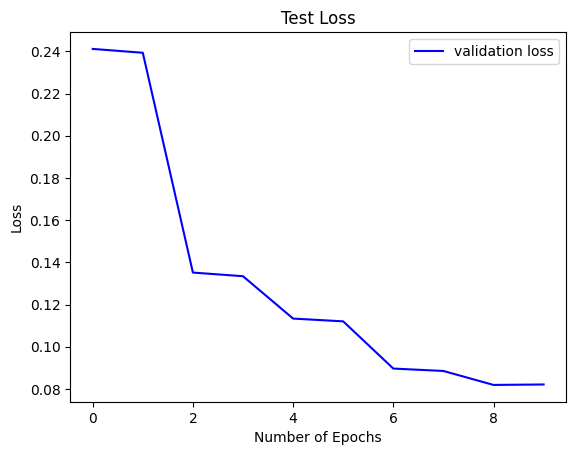

In [64]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


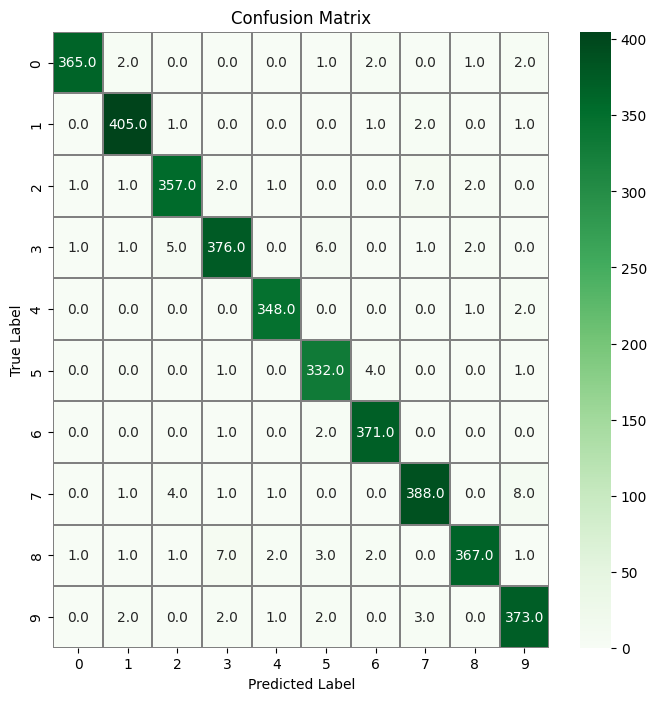

In [65]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()